In [1]:
def sql_to_df(sql):
    
    from google.cloud import bigquery
    
    client = bigquery.Client()
    query_job = client.query(sql)  # Make an API request.
    df = query_job.result().to_dataframe()
    
    return df

In [2]:
%%time

query = """
    SELECT 
      time, 
      temp_K
    FROM test1.weath
    WHERE
     lat = 41.858452
     AND lon = -87.641113
     AND time LIKE '%12:00%'
"""

df = sql_to_df(query)

Wall time: 10.2 s


In [13]:
'2015-06-16_12:00:00'.

'06-16'

In [17]:
df.time = df.apply(lambda x : x.time.split('2015-')[1].split('_')[0] , axis=1)

In [19]:
df = df.sort_values(by='time').reset_index()

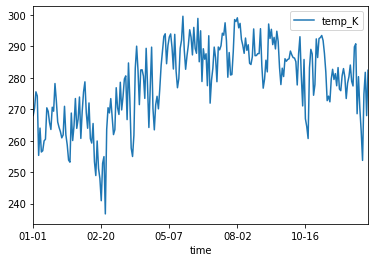

In [21]:
df.plot.line(x='time', y='temp_K')